In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import datetime
import time

In [3]:
df = pd.read_excel('test_data.xls')

In [4]:
df.ix[0]

ship_name                                                            姐客戶
ship_mobile                                                  16143836292
order_id                                                 170102235550041
total_amount                                                          34
final_amount                                                          34
pay_status                                                             1
ship_status                                                            1
is_delivery                                                            Y
try_order                                                          False
erp_order_id                                                           1
erp_status                                                          succ
createtime                                                    1483372544
last_modified                                                 1483855998
payment                                            

In [5]:
# top 10 常客
df.ship_mobile.value_counts().head(10)

17166769648    23
16143545425    22
16143452034    14
17015859490    13
17131246473    13
17188915242    13
16104542317    12
16103411770    11
16140271796    11
16594905358    11
Name: ship_mobile, dtype: int64

In [6]:
# top 10 顾客
df.groupby('ship_mobile')['total_amount'].sum().sort_values(ascending=False).head(10)

ship_mobile
16025631922    6718.00
17166769648    6420.86
16143545425    5002.66
16143452034    3969.50
17015859490    3603.17
16104542317    3599.37
16143852933    3503.90
17131246473    3332.54
16594856439    3140.21
16165729992    2910.70
Name: total_amount, dtype: float64

客户 17166769648 订单数22，总消费金额6420.86，绝对是VIP

In [7]:
# 观察 total_amount
df.total_amount.describe()

count    5881.000000
mean      109.929809
std       146.618477
min         0.000000
25%        16.000000
50%        80.000000
75%       176.000000
max      5994.000000
Name: total_amount, dtype: float64

- 平均购买金额约 110
- 购买金额差异颇大 (std=146.618477)
- 最小购买金额0， 最大购买金额 5994

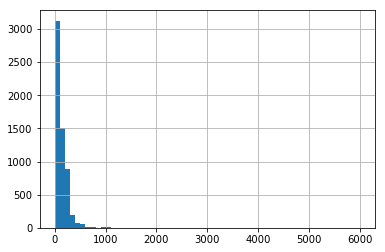

In [8]:
# 用 bar chart 观察消费分布
df.total_amount.hist(bins=60)

In [9]:
# 对消费金额分组
cats = pd.cut(df.total_amount, bins=linspace(0,6000,61)).value_counts()
cats = cats[cats != 0]
cats

(0, 100]        2694
(100, 200]      1516
(200, 300]       869
(300, 400]       193
(400, 500]        82
(500, 600]        51
(900, 1000]       12
(600, 700]        10
(700, 800]         5
(800, 900]         4
(1000, 1100]       3
(1300, 1400]       1
(1100, 1200]       1
(5900, 6000]       1
Name: total_amount, dtype: int64

用 1000元 将购买行为分成两部分
- 一般消费者
- 高端消费者

In [10]:
# 一般消费者
df1 = df[df.total_amount < 1000]
df1.total_amount.describe()

count    5868.000000
mean      106.992922
std       117.425926
min         0.000000
25%        16.000000
50%        79.000000
75%       175.000000
max       994.000000
Name: total_amount, dtype: float64

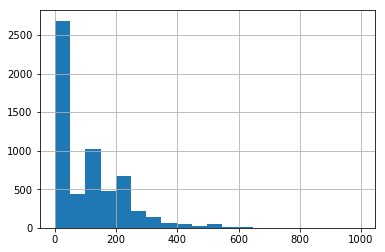

In [11]:
df1.total_amount.hist(bins=20)

In [12]:
# 发现消费金额为 0 的订单
df0 = df[df.total_amount == 0]
len(df0)

439

应该追查原因
- 为何放弃购买：价格太贵？找不到想买的？购物车设计不良？
- 那些人放弃购买：来乱的？熟客？
- 什么时间：商品缺货？竞争对手促销？
- 放弃购买时购物车里有哪些商品？
- 放弃购买的人地理分布：距离太远、运送时间太久？

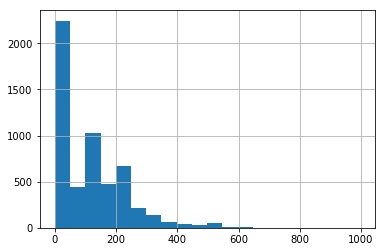

In [13]:
# 移除0元订单
df1 = df1[df1.total_amount != 0]
df1.total_amount.hist(bins=20)

In [14]:
# 观察1000元以上的订单
df2 = df[df.total_amount >= 1000]
df2.groupby('ship_mobile')['total_amount'].agg(['count','sum'])

,count,sum
ship_mobile,,
16025631922,1,5994.00
16027987710,1,1303.60
16047130497,2,2000.00
16058109885,1,1000.00
16073163745,1,1096.60
16111321232,1,1000.00
16140231576,1,1081.00
16143852933,1,1033.10
16166056665,1,1000.00


In [15]:
# 查看客户 16025631922
mobile_16025631922 = df[df.ship_mobile == 16025631922]
mobile_16025631922

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
1726,泠客戶,16025631922,170114121503016,5994.0,5994.0,1,1,Y,False,1,...,0,121.639651,31.324147,False,17011412150301644808,True,1,NaN,simplified_chinese,display
1965,泠客戶,16025631922,170116105955945,724.0,724.0,1,1,Y,False,1,...,0,121.639651,31.324147,False,17011610595594558220,True,0,NaN,simplified_chinese,display


In [16]:
100 * mobile_16025631922.total_amount.sum() / df.total_amount.sum()

1.0391382898554062

虽然只下了两次单，但人家好歹也占营业额1%啊！这个“泠客戶”值得注意

In [17]:
# 发现一个有趣的现象: 好几张订单金额都是1000，呼应某种促销活动吗？
df2[df2.total_amount % 1000 == 0]

,ship_name,ship_mobile,order_id,total_amount,final_amount,pay_status,ship_status,is_delivery,try_order,erp_order_id,...,fuzzy,longitude,latitude,scalping,out_trade_no,autoSendErp,autoSendErpStatus,string_tag_id,lang,delivery_note_price
1010,姐客戶,16047130497,170119203298825,1000.0,1000.0,0,0,Y,False,1,...,0,NaN,NaN,False,17011920329882570353,True,0,NaN,simplified_chinese,display
1011,姐客戶,16047130497,170119203477079,1000.0,1000.0,0,0,Y,False,1,...,0,NaN,NaN,False,17011920347707959751,True,0,NaN,simplified_chinese,display
1265,鱼客戶,16058109885,170109171697490,1000.0,1000.0,0,0,Y,False,1,...,0,NaN,NaN,False,17010917169749081441,True,0,NaN,simplified_chinese,display
1429,墨客戶,16941369693,170111043753996,1000.0,1000.0,0,0,Y,False,1,...,0,NaN,NaN,False,17011104375399686397,True,0,NaN,simplified_chinese,display
2935,娜客戶,17188596867,170122143590991,1000.0,1000.0,1,1,Y,False,1,...,1,121.390661,31.325194,False,17012214359099109102,True,0,NaN,simplified_chinese,display
3490,玲客戶,16111321232,170205221886076,1000.0,1000.0,1,1,Y,False,1,...,0,121.452639,31.217353,False,17020522188607696113,True,0,NaN,simplified_chinese,display
3576,斌客戶,16166056665,170208144367916,1000.0,1000.0,0,0,Y,False,0,...,1,121.516388,31.160659,False,NaN,True,0,NaN,simplified_chinese,display


In [18]:
# 观察 shipping
df['shipping'].value_counts()

冷链直供      4905
一米市集直送     976
Name: shipping, dtype: int64